In [1]:
using StatsPlots
using Plots
using DataFrames
using CSV
using Statistics

In [2]:
function double_boxplot(;df, group_var, var_one, var_two, title_plot)
    max_y = maximum(
        (maximum(df[!, var_one]),
        maximum(df[!, var_two]))
    )
    min_y = minimum(
        (minimum(df[!, var_one]),
        minimum(df[!, var_two]))
    )
    l = @layout [grid(1, 2)]
    p1 = @df df boxplot(string.(cols(group_var)), cols(var_one), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_one))
    p2 = @df df boxplot(string.(cols(group_var)), cols(var_two), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_two))
    all_p = plot(p1, p2, layout = l)
    all_p[:plot_title] = title_plot
    plot(all_p)
end;

In [5]:
df_metrics = CSV.read("./simulation_MS_with_randomisation.csv", DataFrames.DataFrame);

In [6]:
df_metrics[1:5, :]

Row,block_diagonal,corr_first,corr_second,prop_non_zero,FDR_rand_plus_MS,FDR_rand_only,FDR_MS_only,TPR_rand_plus_MS,TPR_rand_only,TPR_MS_only,round_prop_non_zero
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.0,0.0,0.05,0.186236,0.0994949,0.189433,0.97,0.87,0.55,0.05
2,1.0,0.0,0.0,0.1,0.162918,0.162958,0.175604,0.855,0.71,0.25,0.1
3,1.0,0.0,0.0,0.15,0.259172,0.14099,0.290837,0.673333,0.446667,0.106667,0.15
4,1.0,0.0,0.0,0.2,0.245492,0.139134,0.260827,0.4,0.195,0.0725,0.2
5,1.0,0.0,0.0,0.25,0.361141,0.187443,0.189372,0.398,0.166,0.044,0.25


# Results Analysis
Simulations based on the same structure used in the paper on Mirror Statistic, but with a lower ratio of n/p, n=100, p=200. Here I have simulated multiple scenarios with proportions of non-zero coefficients ranging from 5% to 30%.
Features Covariance matrix with a random and block structure.

### False Discovery Rate

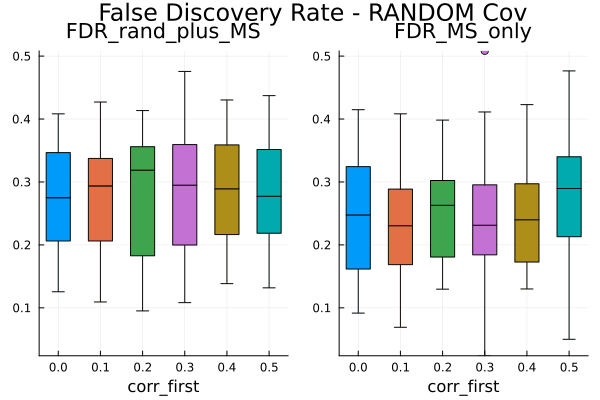

In [7]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:corr_first,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate - RANDOM Cov"
)

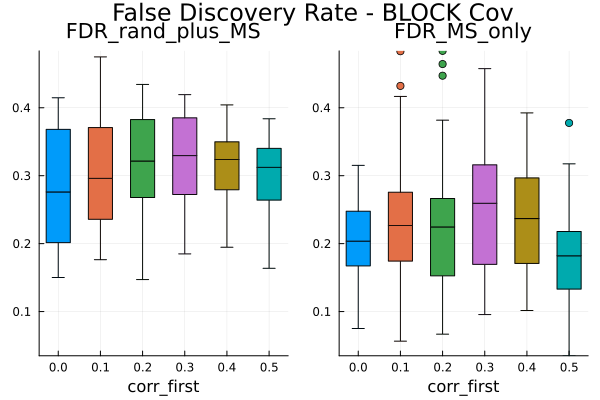

In [8]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:corr_first,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate - BLOCK Cov"
)


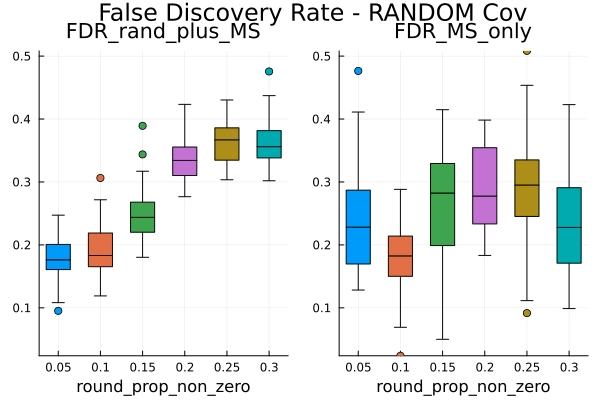

In [9]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:round_prop_non_zero,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate - RANDOM Cov"
)

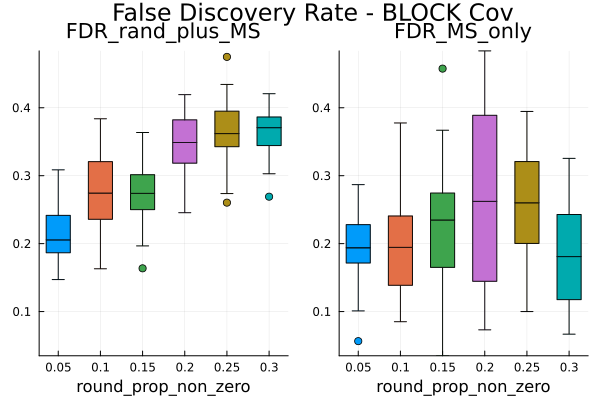

In [10]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:round_prop_non_zero,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate - BLOCK Cov"
)

### True Positive Rate

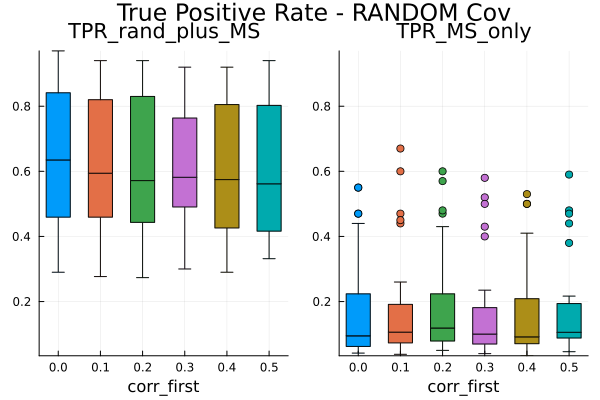

In [11]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:corr_first,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate - RANDOM Cov"
)

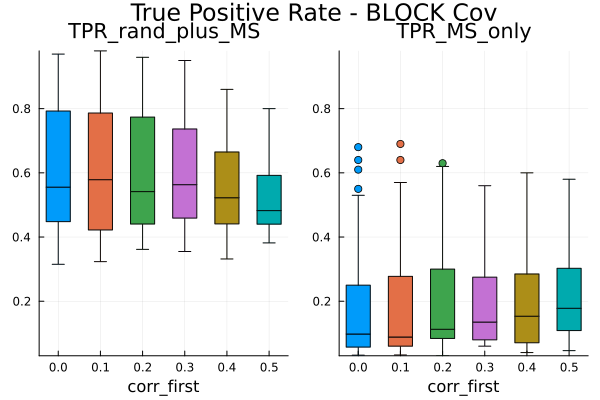

In [12]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:corr_first,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate - BLOCK Cov"
)

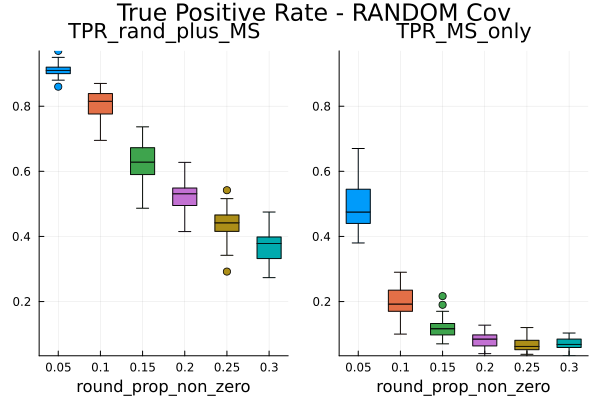

In [13]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:round_prop_non_zero,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate - RANDOM Cov"
)

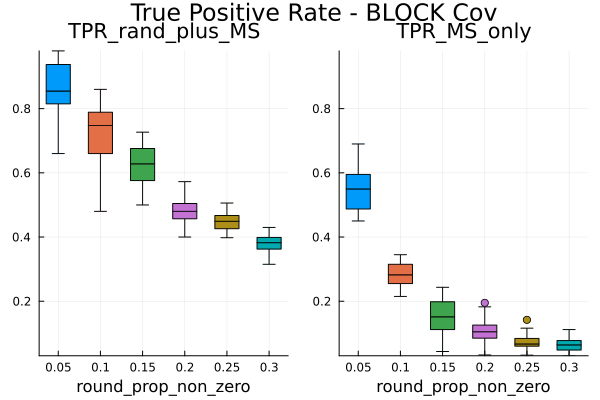

In [14]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:round_prop_non_zero,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate - BLOCK Cov"
)

All together with Randomisation only

In [15]:
println("Average TPR Rand+MS: $(round(mean(df_metrics.TPR_rand_plus_MS), digits=3)), std: $(round(std(df_metrics.TPR_rand_plus_MS), digits=3))")
println("Average TPR MS Only: $(round(mean(df_metrics.TPR_MS_only), digits=3)), std: $(round(std(df_metrics.TPR_MS_only), digits=3))")
println("Average TPR Rand Only: $(round(mean(df_metrics.TPR_rand_only), digits=3)), std: $(round(std(df_metrics.TPR_rand_only), digits=3))")

Average TPR Rand+MS: 0.6, std: 0.191
Average TPR MS Only: 0.189, std: 0.167
Average TPR Rand Only: 0.401, std: 0.237


In [16]:
println("Average FDR Rand+MS: $(round(mean(df_metrics.FDR_rand_plus_MS), digits=3)), std: $(round(std(df_metrics.FDR_rand_plus_MS), digits=3))")
println("Average FDR MS Only: $(round(mean(df_metrics.FDR_MS_only), digits=3)), std: $(round(std(df_metrics.FDR_MS_only), digits=3))")
println("Average FDR Rand Only: $(round(mean(df_metrics.FDR_rand_only), digits=3)), std: $(round(std(df_metrics.FDR_rand_only), digits=3))")

Average FDR Rand+MS: 0.294, std: 0.081
Average FDR MS Only: 0.236, std: 0.09
Average FDR Rand Only: 0.177, std: 0.053


# Summary
Performance comparison of using **Mirror Statistic with Randomisation** (Rand+MS) versus using **standard Mirror Statistic** (MS only), which refers to Mirror Statistic used with a simple Data Splitting mechanism. The metrics tracked here are False Discovery Rate (FDR) and True Positive Rate (TPR, aka Sensitivity, Recall, Hit Rate).  
In addition **Randomisation only** (Rand only) is included in the comparison. *However*, using only Randomisation does not allow for a direct adjustment and control of FDR (or maybe we could adjust the p-values assuming those of the excluded variables are 1...?), therefore empirical FDR is calculated on rejections based on p-values below the 5% threshold.  
Simulations have been done for a standard high-dimensional linear regression with **n=100** observations and **p=200** covariates. 10 replications have been made for each combination of the following:
- Random and Block covariance structure. The block structure implies that the 0-coefficients all belong to one block and are uncorrelated with the non-zero coefficients (which is a required assumption for Mirror Statistic to work)
- The proportion of non-zero coefficients varied between 0.05 to 0.3
- Covarites are generted from a multivariate Normal distribution with different covariance structure
    - Identity matrix
    - Toeplitz structure, with first off-diagonal correlation coefficients ranging from 0 to 0.5 and second off-diagonal correlation coefficients ranging from 0 to 0.4

### Key takeways:
- TPR is considerably higher for Rand+MS than for MS only, over all scenarios, with or without Block Covariance. This could imply a higher power using Randomistion to "split" the data between variable selection and inference on coeffiecients.
- FDR values are very close for both methods over all scenarios.
    - For Rand + MS, the FDR grows as the proportion of non-zero coefficients grows, which is intuitive as there is less information for a higher number of coefficients to be estimated. However, it is pretty much stable for MS only, with a higher variability
    - Using a Block Covariance structure seems to help the MS only, not by much thoug.
- Crucially, both methods using Mirror Statistic didn't really achieved the FDR control that was set up, i.e. 10% in this simulation. This is probably due to the higher ratio of p/n (and p1/n, with p1 being the number of non-zero coefficients)